<a href="https://colab.research.google.com/github/armangupta910/Movie-Recommendor-System/blob/main/Dataset_Modification_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime

def extract_info(timestamp):
    # Converting timestamp to datetime object
    date_time = datetime.fromtimestamp(timestamp)

    # Extracting date, month, year, and day
    date = date_time.day
    month = date_time.month
    year = date_time.year
    day = date_time.strftime("%A")  # Extracting day as Monday, Tuesday, etc.

    if month in [3, 4, 5]:
        season = 'Spring'
    elif month in [6, 7, 8]:
        season = 'Summer'
    elif month in [9, 10, 11]:
        season = 'Autumn'
    else:
        season = 'Winter'

    return date, month, year, day, season

df = pd.read_csv('https://raw.githubusercontent.com/armangupta910/Movie-Recommendor-System/main/dataSet/complete_data%20-%20complete_data%20(1).csv.csv')

# Extracting info from 'timestamp_x' column and add new columns
df['timestamp_x'] = pd.to_numeric(df['timestamp_x'])  # Convert to numeric in case it's not
df['date'], df['month'], df['year'], df['day'], df['season'] = zip(*df['timestamp_x'].apply(extract_info))

# Merging date, month, year columns using "?" and overwrite the 'date' column
df['date'] = df['date'].astype(str) + "/" + df['month'].astype(str) + "/" + df['year'].astype(str)
df.drop(columns=['month', 'year'], inplace=True)

df.to_csv('modified_movielens_dataset.csv', index=False)

Missing Values Before Removing Columns:
userId             0
movieId            0
rating             0
timestamp_x        0
title              0
genres             0
tag                0
timestamp_y    99201
date               0
day                0
season             0
dtype: int64
   userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres     tag        date        day  \
0  Adventure|Animation|Children|Comedy|Fantasy  no tag   30/7/2000     Sunday   
1  Adventure|Animation|Children|Comedy|Fantasy  no tag   8/11/1996     Friday   
2  Adventure|Animation|Children|Comedy|Fantasy  no tag   25/1/2005    Tuesday   
3  Adventure|Animation|Children

<ipython-input-14-dfb589dab742>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='coolwarm')


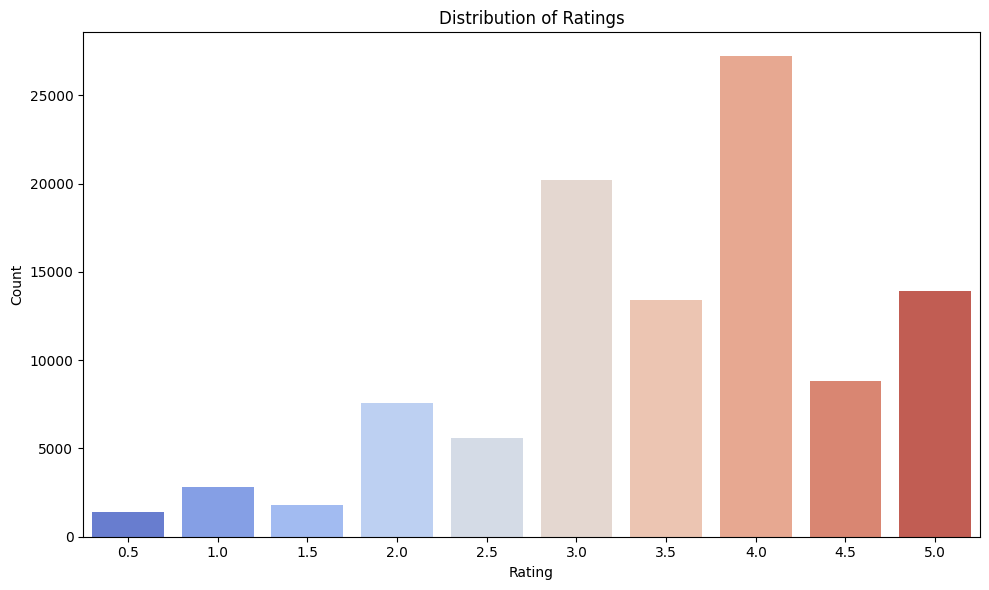

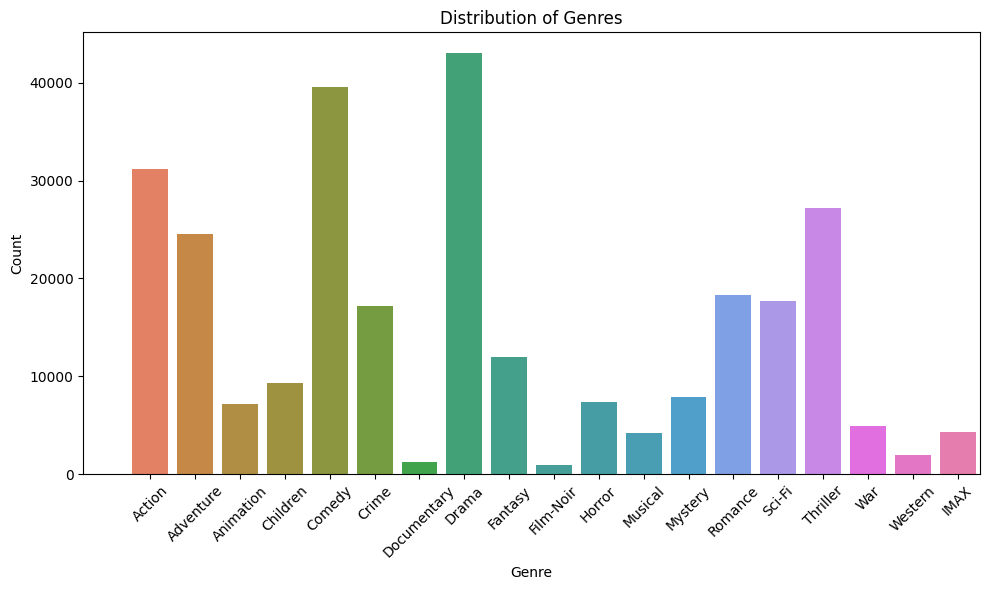

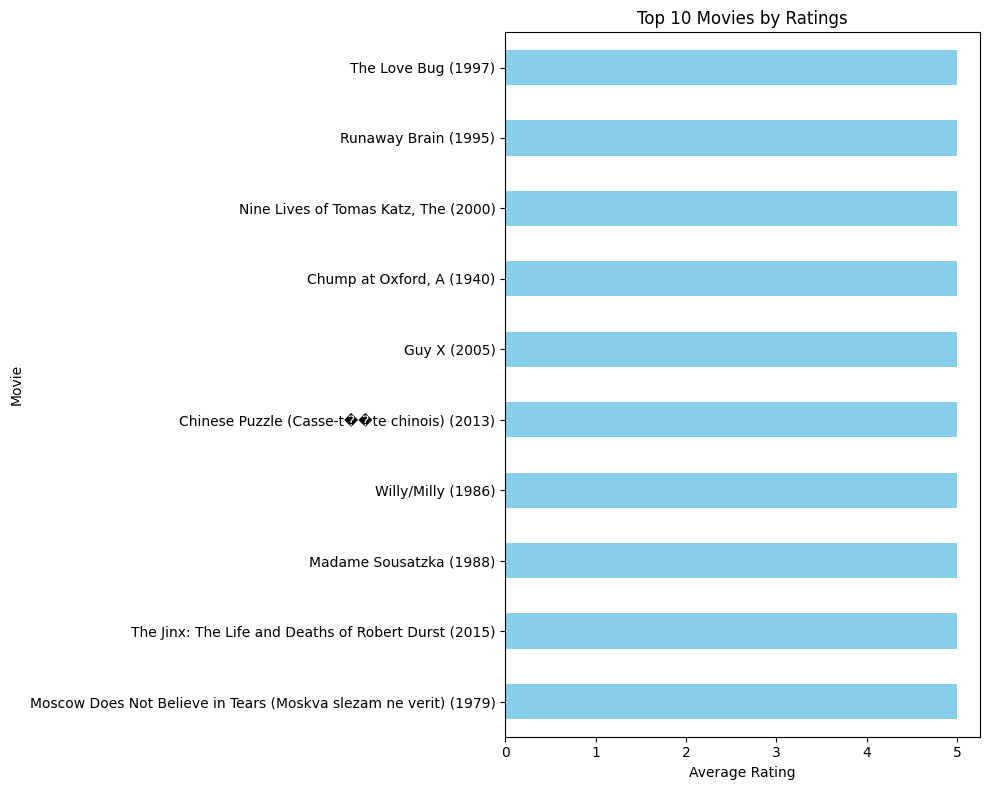

<ipython-input-14-dfb589dab742>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['genres'].apply(lambda x: any(genre in x for genre in top_5_genres))], y='genres', x='rating', palette='viridis')  # Switched x and y


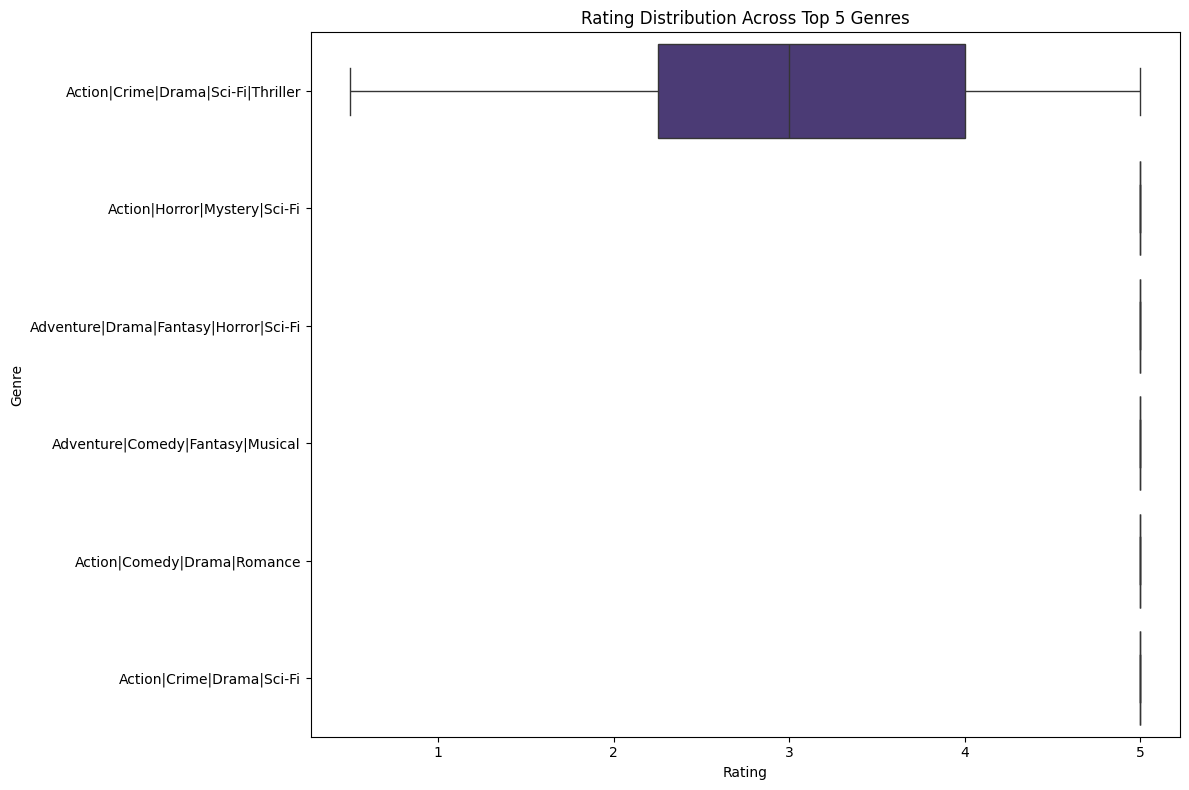

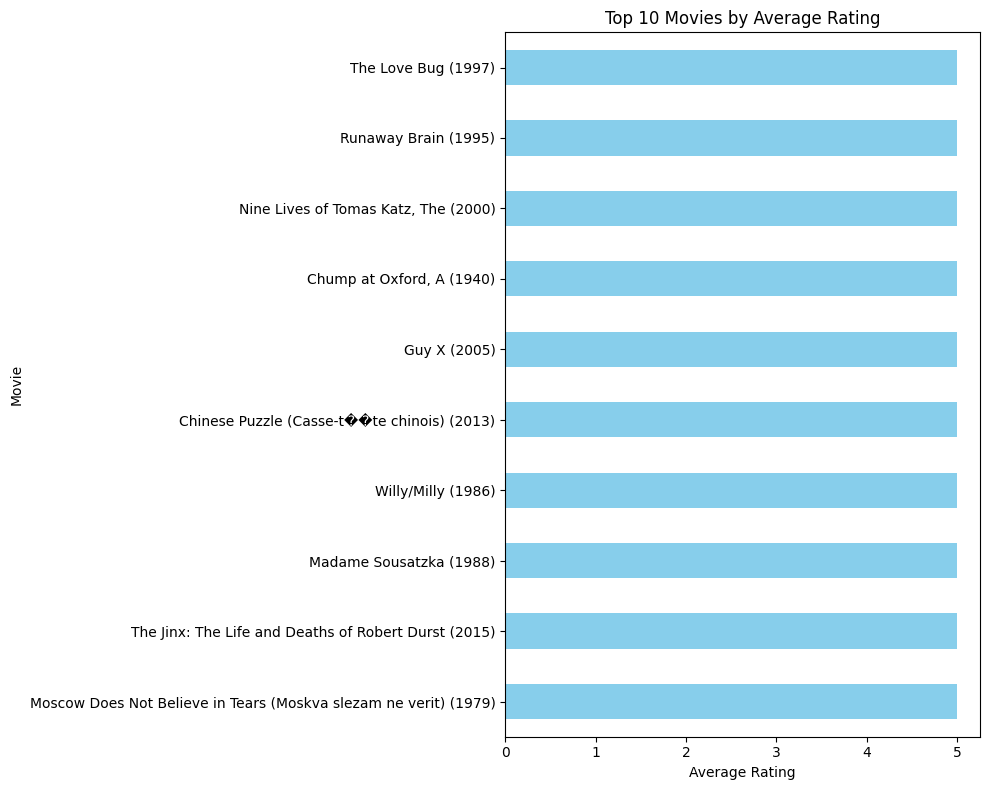

In [14]:
#preprocessing the modified dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/armangupta910/Movie-Recommendor-System/main/modified_movielens_dataset.csv')

# Handling missing values
# Impute missing values in 'tag' column with 'no tag'
df['tag'].fillna('no tag', inplace=True)

# Check for missing values in other columns
missing_values = df.isnull().sum()
print("Missing Values Before Removing Columns:")
print(missing_values)

# Drop 'timestamp_y' column
df.drop(columns=['timestamp_y'], inplace=True)

# Rename 'timestamp_x' column to 'timestamp'
df.rename(columns={'timestamp_x': 'timestamp'}, inplace=True)

# Define genre mapping
genre_mapping = {
    'Action': 1, 'Adventure': 2, 'Animation': 3, 'Children': 4, 'Comedy': 5,
    'Crime': 6, 'Documentary': 7, 'Drama': 8, 'Fantasy': 9, 'Film-Noir': 10,
    'Horror': 11, 'Musical': 12, 'Mystery': 13, 'Romance': 14, 'Sci-Fi': 15,
    'Thriller': 16, 'War': 17, 'Western': 18, 'IMAX': 19  # Add IMAX
}

# Function to encode genres
def encode_genres(genre_string):
    genres = genre_string.split('|')
    encoded_genres = [str(genre_mapping.get(genre, 0)) for genre in genres]  # Use .get() to handle missing genres
    return '|'.join(encoded_genres)

# Apply genre encoding to 'genres' column
df['genres_encoded'] = df['genres'].apply(encode_genres)

# Print the first few rows to verify the encoding
print(df.head())

# Save the modified dataframe to a new CSV file
df.to_csv('modified_file_encoded.csv', index=False)



# Data visualization
# Ratings vs. Movies
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', palette='coolwarm')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.tight_layout()
plt.show()

# Read the encoded CSV file
df = pd.read_csv('modified_file_encoded.csv')

# Define genre mapping with short forms
genre_mapping_short = {
    '1': 'Action', '2': 'Adventure', '3': 'Animation', '4': 'Children', '5': 'Comedy',
    '6': 'Crime', '7': 'Documentary', '8': 'Drama', '9': 'Fantasy', '10': 'Film-Noir',
    '11': 'Horror', '12': 'Musical', '13': 'Mystery', '14': 'Romance', '15': 'Sci-Fi',
    '16': 'Thriller', '17': 'War', '18': 'Western', '19': 'IMAX'
}

# Calculate genre counts
genres_count = {}
for encoded_genres_list in df['genres_encoded']:
    for genre in encoded_genres_list.split('|'):
        genres_count[genre] = genres_count.get(genre, 0) + 1

# Sort genre counts by genre code
sorted_genres_count = {k: v for k, v in sorted(genres_count.items(), key=lambda item: int(item[0]))}

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_genres_count.keys()), y=list(sorted_genres_count.values()), hue=list(sorted_genres_count.keys()), legend=False)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=45)

# Replace x-axis labels with short forms for valid genre codes
valid_genre_codes = [genre for genre in sorted_genres_count.keys() if genre in genre_mapping_short]
plt.xticks(valid_genre_codes, [genre_mapping_short[genre] for genre in valid_genre_codes])

plt.tight_layout()
plt.show()

# Top 10 movies by ratings
top_10_movies = df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 8))  # Adjusted figure size
top_10_movies.plot(kind='barh', color='skyblue')  # Horizontal bar plot
plt.ylabel('Movie')  # Y-axis label
plt.xlabel('Average Rating')  # X-axis label
plt.title('Top 10 Movies by Ratings')
plt.tight_layout()
plt.show()

# Rating distribution across top 5 genres
top_5_genres = df.groupby('genres')['rating'].mean().nlargest(5).index  # Top 5 genres based on ratings
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[df['genres'].apply(lambda x: any(genre in x for genre in top_5_genres))], y='genres', x='rating', palette='viridis')  # Switched x and y
plt.xlabel('Rating')  # Adjusted labels
plt.ylabel('Genre')
plt.title('Rating Distribution Across Top 5 Genres')
plt.tight_layout()
plt.show()

# Top 10 movies by average rating
top_10_average_rating = df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 8))  # Adjusted figure size
top_10_average_rating.plot(kind='barh', color='skyblue')  # Horizontal bar plot
plt.ylabel('Movie')  # Y-axis label
plt.xlabel('Average Rating')  # X-axis label
plt.title('Top 10 Movies by Average Rating')
plt.tight_layout()
plt.show()